In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('iris.csv',names=['Sepal_length','Sepal_width','Petal_length','Petal_width','Flower'])

In [3]:
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Flower        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Basic Information

In [5]:
data.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Flower'], dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
data.shape

(150, 5)

In [8]:
data.ndim

2

In [9]:
data.size

750

In [10]:
data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Flower          0
dtype: int64

## Static Information

In [11]:
flower = data.groupby('Flower')

In [12]:
flower.mean()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Flower,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [13]:
flower.std()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Flower,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [14]:
data.mean()

Sepal_length    5.843333
Sepal_width     3.054000
Petal_length    3.758667
Petal_width     1.198667
dtype: float64

In [15]:
data.std()

Sepal_length    0.828066
Sepal_width     0.433594
Petal_length    1.764420
Petal_width     0.763161
dtype: float64

In [16]:
data.median()

Sepal_length    5.80
Sepal_width     3.00
Petal_length    4.35
Petal_width     1.30
dtype: float64

In [17]:
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B8ADDC8>,
      dtype=object)

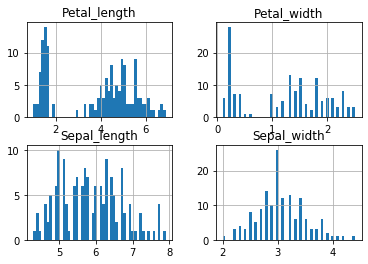

In [18]:
data.hist(bins=50)

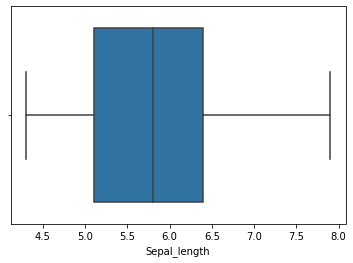

In [19]:
sns.boxplot(data['Sepal_length'])

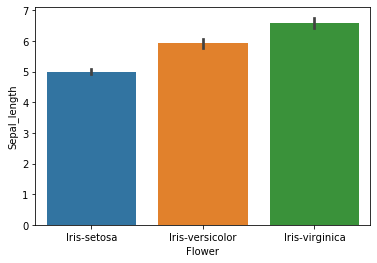

In [20]:
sns.barplot(x='Flower', y='Sepal_length', data = data)

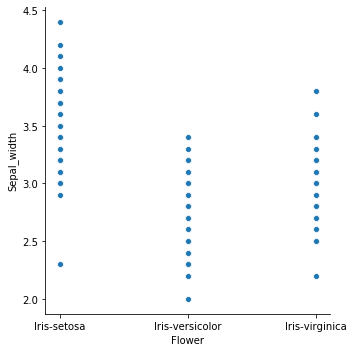

In [21]:
sns.relplot(x='Flower', y='Sepal_width', data=data);

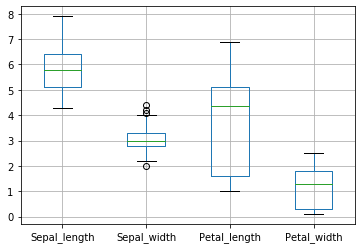

In [22]:
data.boxplot();

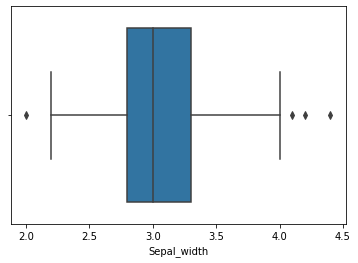

In [23]:
sns.boxplot(data['Sepal_width'])

In [24]:
input_data = data.iloc[:,:4]
target_data = data['Flower']

In [25]:
target_data = target_data.str.get_dummies()

In [26]:
target_data.sample(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
145,0,0,1
100,0,0,1
112,0,0,1
74,0,1,0
80,0,1,0


## Model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.3, random_state=42)

In [29]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
model.score(x_test,y_test)

1.0

## Evaluate the model

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
prediction = model.predict(x_test)

y_test_1 = y_test.to_numpy()

In [34]:
pred = prediction.argmax(axis=1)

In [35]:
y_test = y_test_1.argmax(axis=1)

In [36]:
confusion_matrix(y_test, pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [37]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

In [43]:
x_test.to_numpy()

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

## Save the model

In [79]:
from joblib import dump
dump(model, 'Iris_model.joblib')

['Iris_model.joblib']

In [80]:
target_data

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [82]:
target_data.to_numpy().argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [51]:
z = x_test.to_numpy()[0]
z

array([6.1, 2.8, 4.7, 1.2])

In [54]:
model.predict([[6.1,2.8,4.7,1.2]]).argmax(axis=1)

array([1], dtype=int64)

In [55]:
data.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
